In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [2]:
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

In [3]:
data_df = pd.concat([X, y], axis=1)

In [4]:
data_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Evaluate and transform income

<Axes: xlabel='income'>

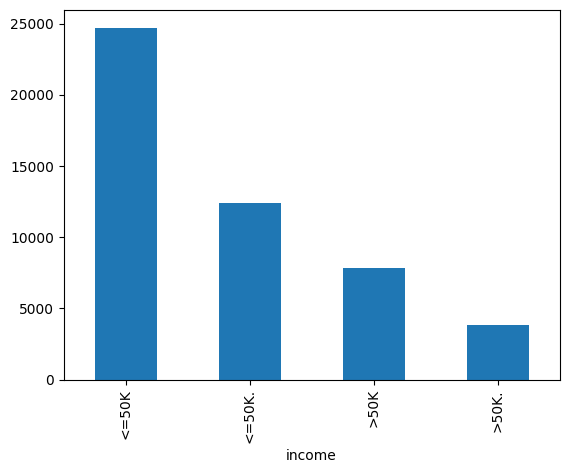

In [5]:
data_df.income.value_counts().plot(kind='bar')

<Axes: xlabel='income'>

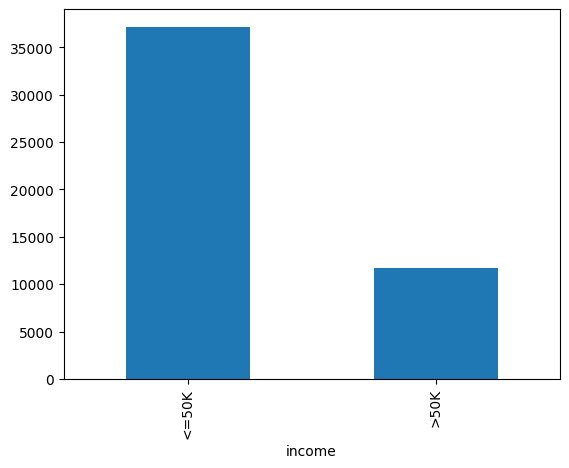

In [6]:
data_df.income = data_df.income.replace('<=50K.', '<=50K')
data_df.income = data_df.income.replace('>50K.', '>50K')
data_df.income.value_counts().plot(kind='bar')

In [7]:
data_df['income_class'] = data_df.income.map({'<=50K': 0, '>50K': 1})

In [8]:
data_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [9]:
data_df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [10]:
data_df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [11]:
data_df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [12]:
data_df['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [13]:
data_df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [14]:
data_df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [15]:

def describir_dataframe(df):
    """
    Función para describir detalladamente un DataFrame.

    Args:
        df (pandas.DataFrame): El DataFrame a describir.

    Returns:
        None
    """

    print("Resumen general del DataFrame:")
    print(df.info())

    print("\nEstadísticas descriptivas de las columnas numéricas:")
    print(df.describe())

    print("\nValores únicos y conteo por columna:")
    for col in df.columns:
        print(f"\nColumna: {col}")
        print(f"Valores únicos: {df[col].nunique()}")
        print(f"Tipos de datos: {df[col].dtype}")
        if df[col].dtype == 'object':
            print(f"Valores únicos (categorías):\n{df[col].value_counts()}")
        elif df[col].dtype in ['int64', 'float64']:
            print(f"Valores nulos: {df[col].isnull().sum()}")
            print(f"Valores mínimos: {df[col].min()}")
            print(f"Valores máximos: {df[col].max()}")
            print(f"Media: {df[col].mean()}")
            print(f"Mediana: {df[col].median()}")
            print(f"Desviación estándar: {df[col].std()}")

    print("\nColumnas con valores faltantes:")
    missing_values = df.isnull().sum()
    for col, count in missing_values.items():
        if count > 0:
            print(f"{col}: {count} valores faltantes")

    print("\nColumnas categóricas con valores '?':")
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].str.contains(r'\?').any():
            print(f"{col}: {df[col].value_counts()['?']} valores '?'")

    for col in df.select_dtypes(include=['number']):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        print(f"Valores atípicos en {col}: {outliers.shape[0]}")

    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            # Si la variable es numérica, crea un histograma
            plt.figure(figsize=(8, 4))
            sns.histplot(data=df, x=col, kde=True)
            plt.title(f"Distribución de {col}")
            plt.show()
        else:
            # Si la variable es categórica, crea un gráfico de conteo
            plt.figure(figsize=(8, 4))
            sns.countplot(data=df, x=col)
            plt.title(f"Conteo de valores en {col}")
            plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
            plt.show()


Resumen general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
 15  income_class    48842 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 6.0+ MB
None

Estadísticas

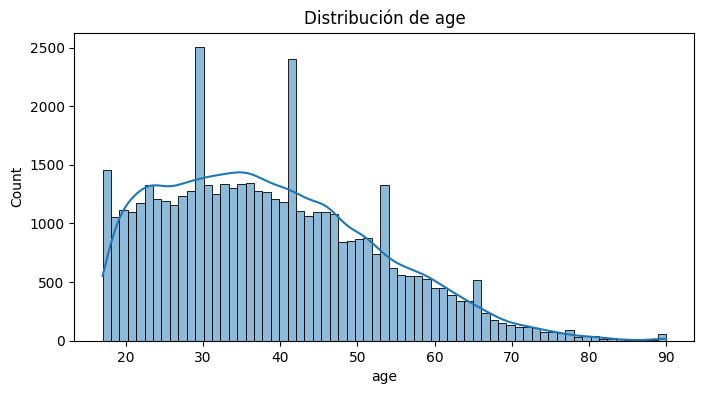

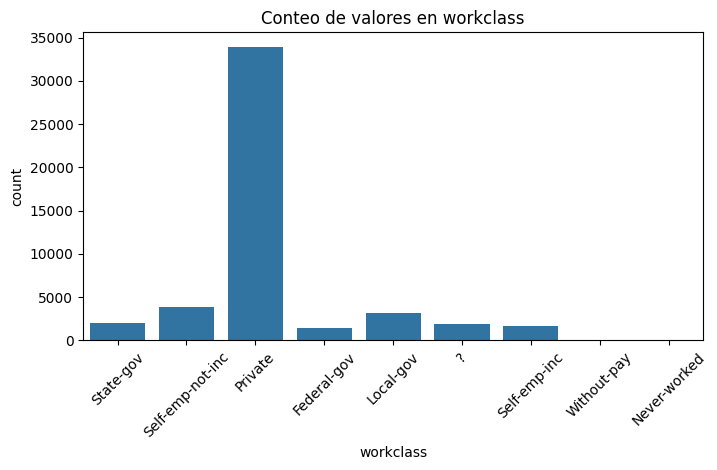

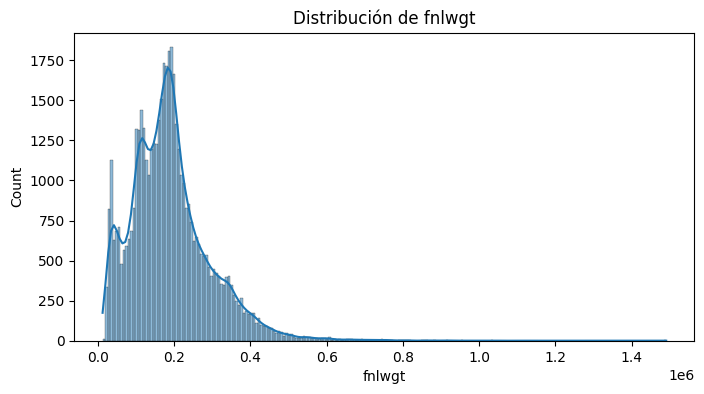

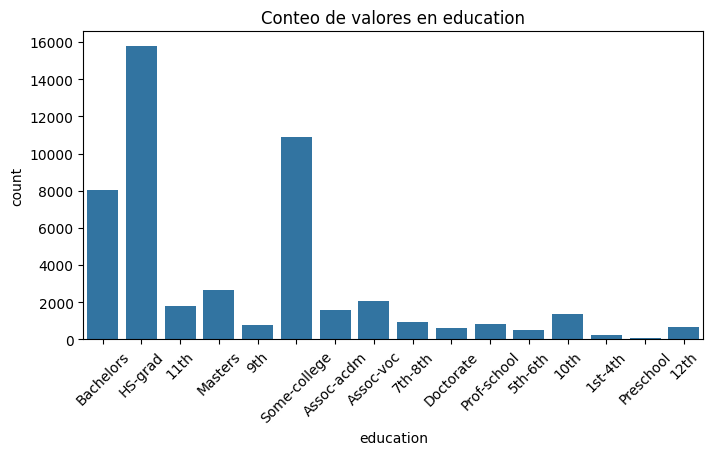

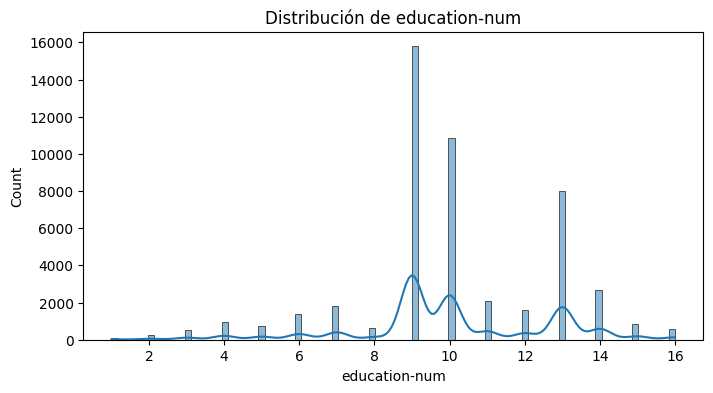

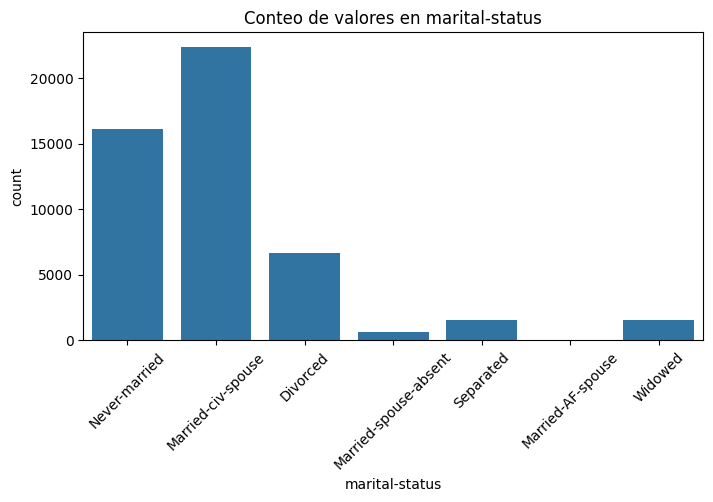

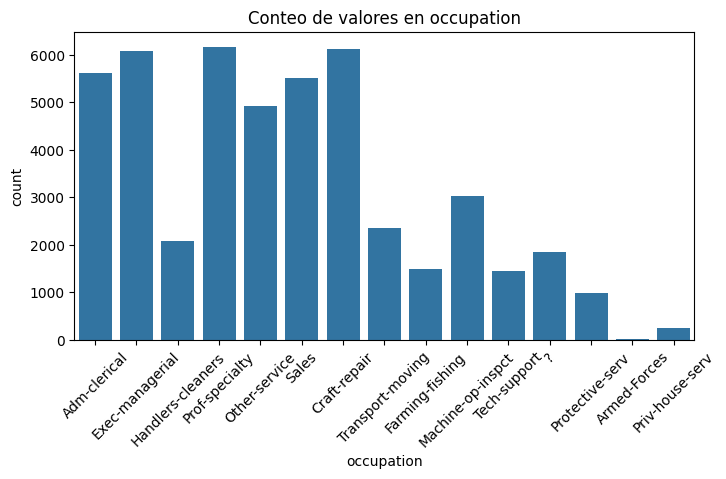

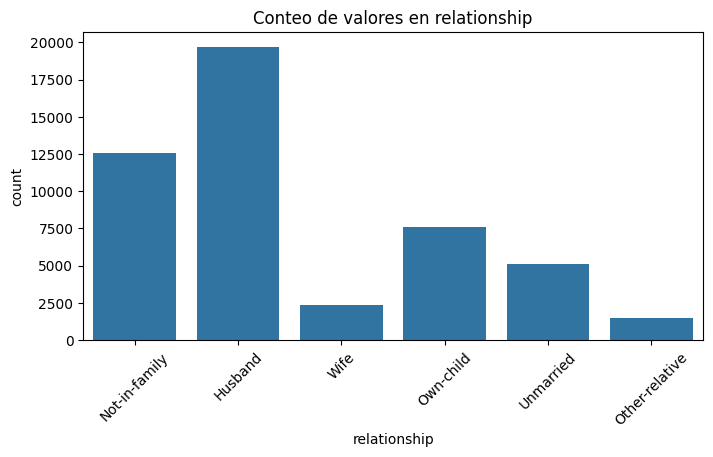

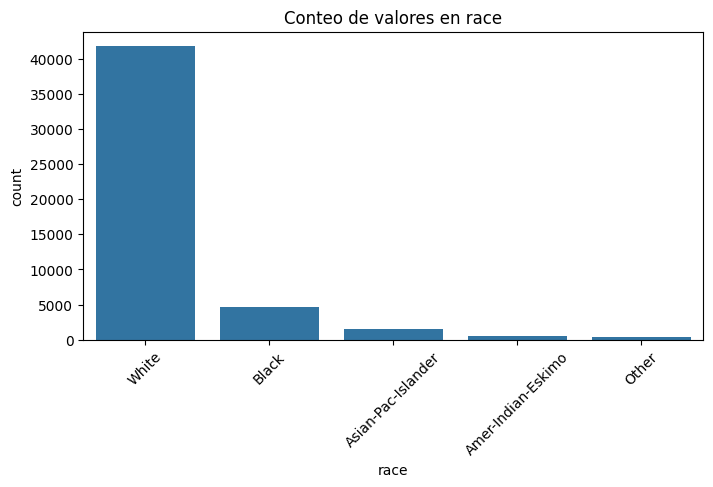

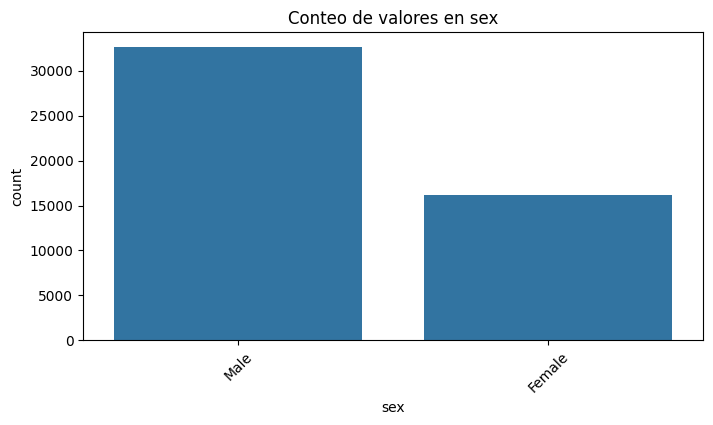

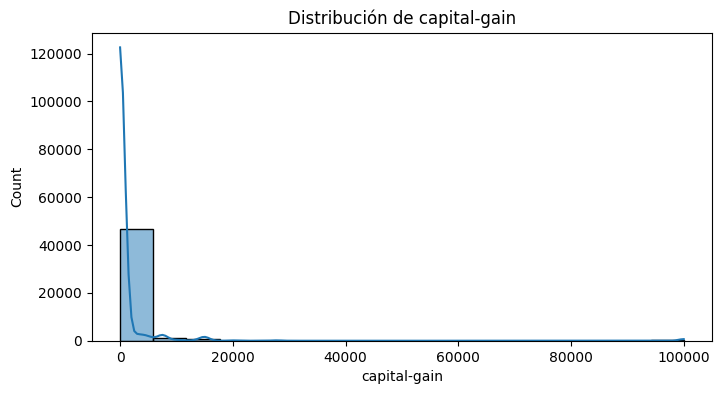

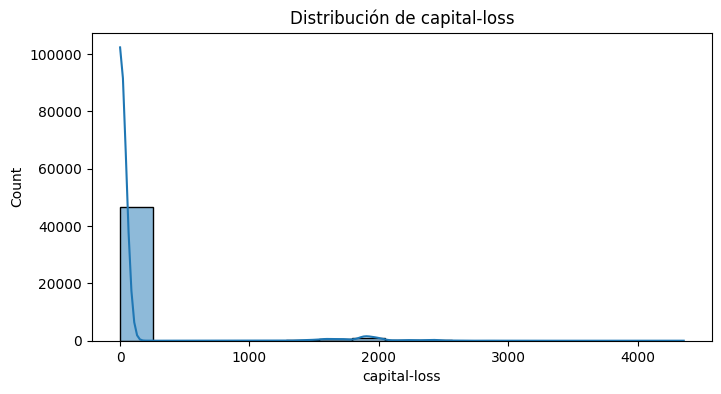

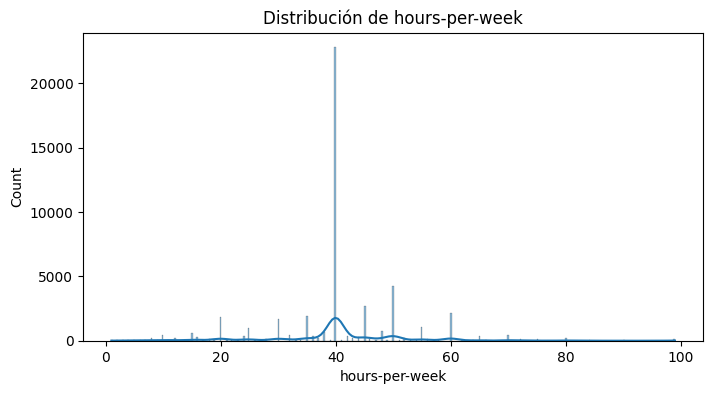

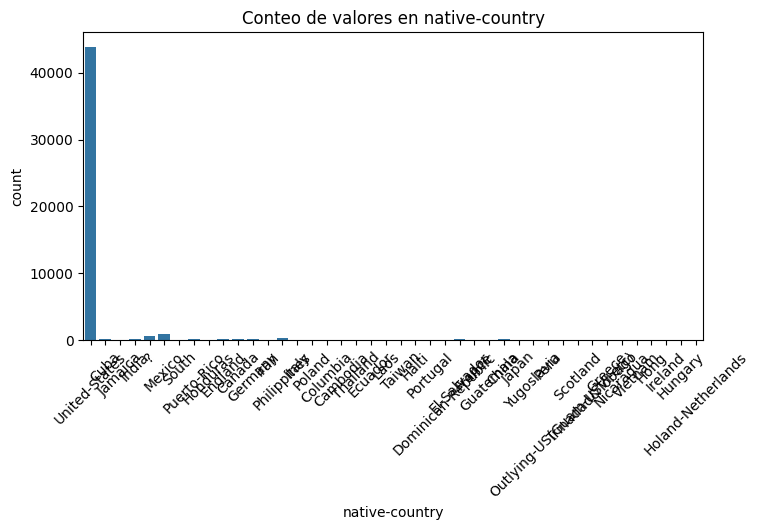

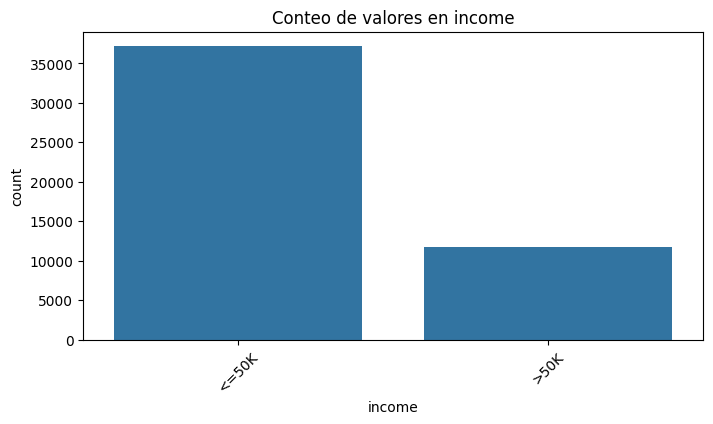

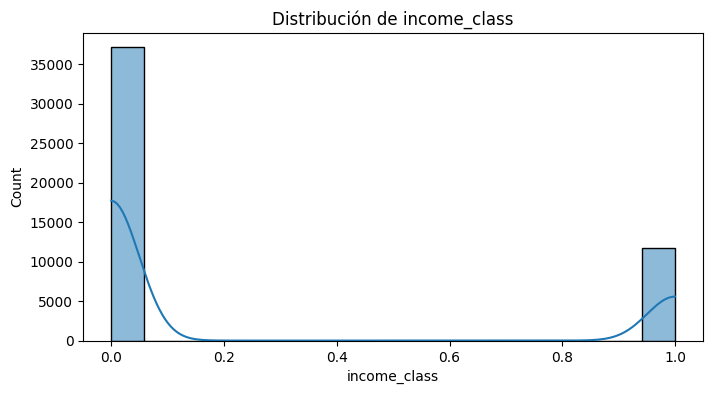

In [16]:
describir_dataframe(data_df)

In [18]:
import os
cwd = os.getcwd()
print(cwd)
root_path = os.path.dirname(cwd)
print(root_path)

/Users/sero/Documents/datascience_master/ml1/workdir/project1/code
/Users/sero/Documents/datascience_master/ml1/workdir/project1


In [19]:
data_df.to_csv(os.path.join(root_path, 'data', 'adult.csv'), index=False)